In [18]:

import os
import pandas as pd
import csv
from scipy import stats

# Set path for file using a raw string literal
covid19 = r"C:\Users\parme\OneDrive\Project-Repo\COVID-19_20240708.csv"

covid19_data = pd.read_csv(covid19)

print(f'Number of rows: {len(covid19_data["Season"])}')
covid19_data.head()
# len(covid19_data['State'])





Number of rows: 145450


,State,Season,_WeekendDate,AgeCategory_Legend,Sex_Label,Race_Label,Type,WeeklyRate,CumulativeRate
0,Utah,2021-22,2022-10-01,All,All,All,Crude Rate,4.1,445.9
1,Utah,2021-22,2022-09-24,All,All,All,Crude Rate,3.1,441.8
2,Utah,2021-22,2022-09-17,All,All,All,Crude Rate,4.6,438.7
3,Utah,2021-22,2022-09-10,All,All,All,Crude Rate,3.9,434.1
4,Utah,2021-22,2022-09-03,All,All,All,Crude Rate,3.8,430.2


In [19]:
import pandas as pd

# Load your data into a pandas DataFrame
data = {
    'Date': ['2020-10-03', '2020-10-03', '2020-10-03', '2020-10-03', '2020-10-03'],
    'Rate': [7.1, 9.5, 22.4, 26.1, 4.7]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by week ending date and calculate cumulative rates
df_weekly = df.set_index('Date').resample('W', origin='start_day').sum()
df_weekly['Cumulative Rate'] = df_weekly['Rate'].cumsum()

print(df_weekly)

            Rate  Cumulative Rate
Date                             
2020-10-04  69.8             69.8


In [22]:


import pandas as pd

# Define the data for the DataFrame
data = {
    '_WeekendDate': ['2022-01-01', '2022-01-01', '2022-01-08', '2022-01-08'],
    'CumulativeRate': [100, 150, 200, 250]
}

# Create the data_wk DataFrame
data_wk = pd.DataFrame(data)

# Convert '_WeekendDate' column to datetime format
data_wk['_WeekendDate'] = pd.to_datetime(data_wk['_WeekendDate'])

# Group data by week ending date and calculate cumulative rates
df_weekly = data_wk.set_index('_WeekendDate').resample('W', closed='left').sum()
df_weekly['Cumulative_Rate'] = df_weekly['CumulativeRate'].cumsum()

df_weekly = df_weekly.reset_index()

print(df_weekly)

  _WeekendDate  CumulativeRate  Cumulative_Rate
0   2022-01-02             250              250
1   2022-01-09             450              700


In [ ]:
# Group data by week ending date and calculate cumulative rates


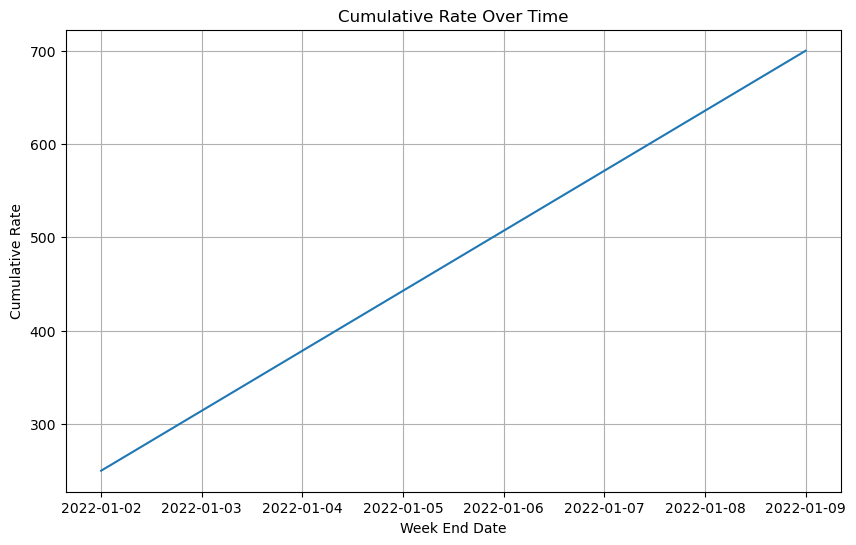

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_weekly["_WeekendDate"], df_weekly["Cumulative_Rate"])
plt.xlabel('Week End Date')
plt.ylabel('Cumulative Rate')
plt.title('Cumulative Rate Over Time')
plt.grid(True)
plt.show()

In [20]:
covid19_data.count()
covid19_data.describe()

,WeeklyRate,CumulativeRate
count,145450.000000,145450.000000
mean,8.143425,234.194590
std,16.521787,402.518595
min,0.000000,0.000000
25%,0.300000,22.200000
50%,2.700000,84.300000
75%,8.600000,267.800000
max,534.800000,5701.300000


In [23]:
covid19_data["Type"].value_counts()

Type
Crude Rate           144320
Age adjusted Rate      1130
Name: count, dtype: int64

In [24]:
# State_count = covid19_data["State"].count()
# State_count = covid19_data["State"].nunique()
# State_count
state_count=pd.DataFrame(covid19_data["State"].value_counts())
state_count
state_count=state_count.reset_index()
state_count


,State,count
0,COVID-NET,11074
1,Utah,9944
2,Tennessee,9944
3,Oregon,9944
4,Ohio,9944
5,New York,9944
6,New Mexico,9944
7,Minnesota,9944
8,Michigan,9944
9,Maryland,9944


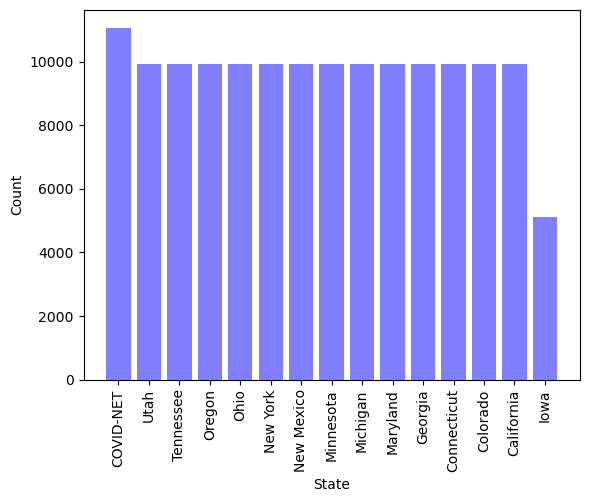

In [26]:
plt.bar(state_count["State"], state_count["count"], color='b', alpha=0.5)
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Bar graph for group age 

group_age = pd.DataFrame(covid19_data["AgeCategory_Legend"].value_counts())
group_age=group_age.reset_index()
group_age

,AgeCategory_Legend,count
0,All,27370
1,0-17 years (Children),26240
2,18+ years (Adults),26240
3,5-11 years,3280
4,5-17 years,3280
5,18-49 years,3280
6,50-64 years,3280
7,65+ years,3280
8,0-<6 months,3280
9,6mo-<12 months,3280


In [28]:
# for age in AgeCategory_Legend;
    
# Sample DataFrame
assign_age_group =covid19_data["AgeCategory_Legend"]

#assign_age_group.value_counts()
new_age = []

Children = ["0-17 years (Children)" , "5-11 years" ,"5-17 years" ,"0-<6 months" ,"6mo-<12 months" ,"1-<2 years" , "2-4 years" ,"12-17 years" ,"0-<1 year" ,"1-4 years" ,"0-4 years"]
Adultes = ["18+ years (Adults)" ,"18-49 years" ,"18-29 years" ,"30-39 years" ,"40-49 years"]      
Middle_Aged =["50-64 years"]
Senior_Citizens = ["65+ years","65-74 years","75-84 years","85+ years","75+ years"]
# All = ["All"]

for age in assign_age_group:
    if age in Children:
        var="Children"
        new_age.append(var)
    elif age in Adultes:
        var="Adultes"
        new_age.append(var)
    elif age in Middle_Aged:
        var="Middle_Aged"
        new_age.append(var)
    elif  age in Senior_Citizens:
        var="Senior_Citizens"
        new_age.append(var)
    else:
        var="All"
        new_age.append(var) 
    
covid19_data.insert(3, "Group_Age", new_age, True)

print(covid19_data["Group_Age"].value_counts())


Group_Age
Children           59040
Adultes            39360
All                27370
Senior_Citizens    16400
Middle_Aged         3280
Name: count, dtype: int64


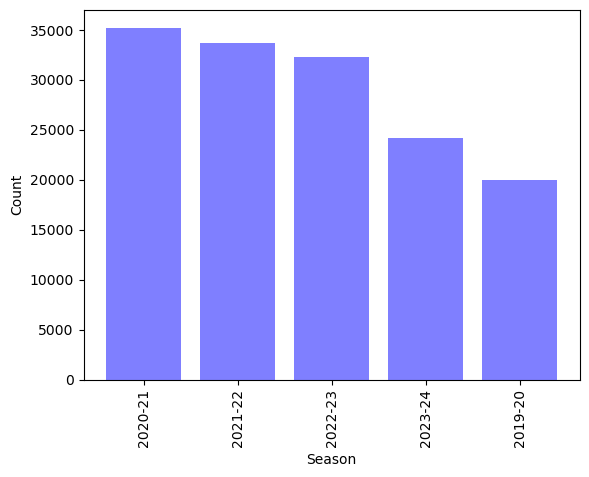

In [30]:
season_data = pd.DataFrame(covid19_data["Season"].value_counts())
season_data = season_data.reset_index()
season_data.columns = ["Season", "Count"]

plt.bar(season_data["Season"], season_data["Count"], color='b', alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [31]:
covid19_data["Race_Label"].value_counts()

Race_Label
All                    95120
Hispanic               10066
A/PI, non-Hispanic     10066
AI/AN, non-Hispanic    10066
Black, non-Hispanic    10066
White, non-Hispanic    10066
Name: count, dtype: int64

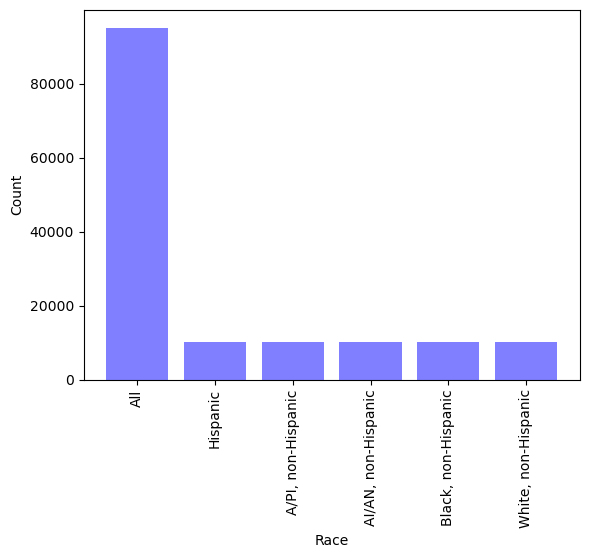

In [32]:


season_data=pd.DataFrame(covid19_data["Race_Label"].value_counts())

season_data=season_data.reset_index()
season_data

plt.bar(season_data["Race_Label"],season_data["count"],color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [33]:
WeeklyRate_data=pd.DataFrame(covid19_data["WeeklyRate"].value_counts())

WeeklyRate_data=WeeklyRate_data.reset_index()
WeeklyRate_data
#y_data=pd.DataFrame(covid19_data["WeeklyRate"].value_counts())

# plt.bar(WeeklyRate_data["WeeklyRate"],WeeklyRate_data["count"],color='b', alpha=0.5)
# plt.xticks(rotation=90)
# plt.show()

,WeeklyRate,count
0,0.0,33742
1,0.5,2038
2,0.6,1966
3,0.4,1964
4,0.9,1948
...,...,...
1471,233.5,1
1472,253.6,1
1473,237.5,1
1474,140.9,1


In [34]:
# Bar graph for group age 

group_age = pd.DataFrame(covid19_data["Group_Age"].value_counts())
group_age=group_age.reset_index()
group_age.value_counts()

Group_Age        count
Adultes          39360    1
All              27370    1
Children         59040    1
Middle_Aged      3280     1
Senior_Citizens  16400    1
Name: count, dtype: int64

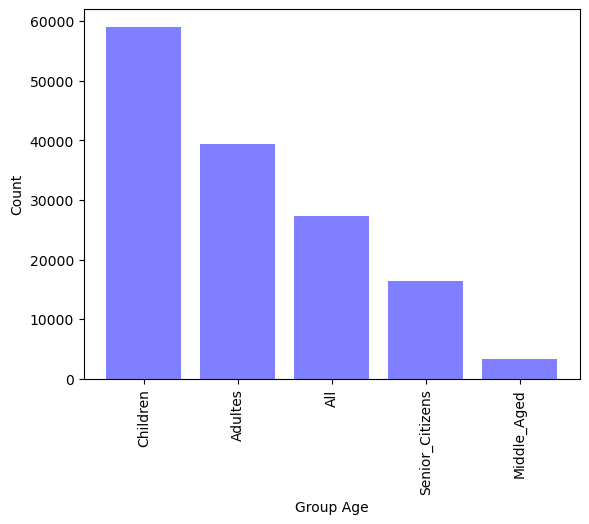

In [35]:
plt.bar(group_age["Group_Age"],group_age["count"],color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Group Age')
plt.ylabel('Count')
plt.show()

In [36]:
# Pie chart for variable sex

sex_count = pd.DataFrame(covid19_data["Sex_Label"].value_counts())

sex_count=sex_count.reset_index()
sex_count

,Sex_Label,count
0,All,125770
1,Female,9840
2,Male,9840


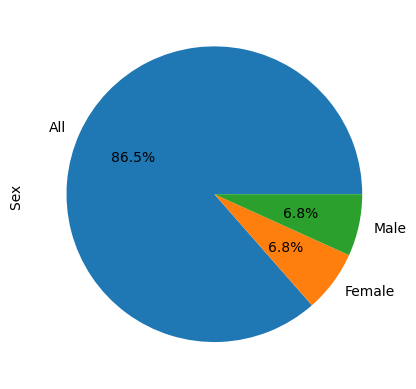

In [37]:
pd_gender = covid19_data["Sex_Label"].value_counts()
#pd_gender = sex_count["Sex_Label"].value_counts()

pd_gender.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Sex ")
plt.show()

In [38]:


x_data=pd.DataFrame(covid19_data["Season"].value_counts())
y_data=pd.DataFrame(covid19_data["WeeklyRate"].value_counts())
x_data = x_data.reset_index()
y_data = y_data.reset_index()
y_data
#x_data
# state_count
# state_count=state_count.reset_index()
# state_count

,WeeklyRate,count
0,0.0,33742
1,0.5,2038
2,0.6,1966
3,0.4,1964
4,0.9,1948
...,...,...
1471,233.5,1
1472,253.6,1
1473,237.5,1
1474,140.9,1


In [39]:
a=covid19_data
print(len(a))
b=covid19_data.loc[covid19_data["CumulativeRate"] < 450]
print(len(b))

pert= (len(a)-len(b))/len(a)*100
print(pert)

145450
123572
15.041595049845307


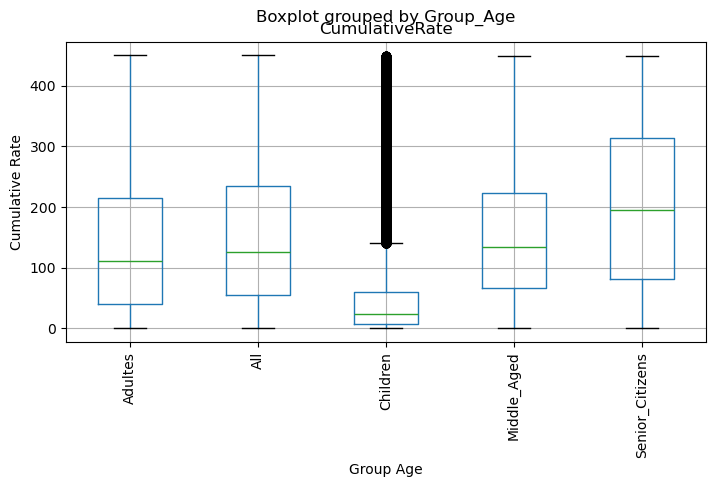

In [41]:
ax1 = covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Group_Age", figsize=(8,4))
ax1.set_xlabel('Group Age')
ax1.set_ylabel('Cumulative Rate')
plt.xticks(rotation=90)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'COVID-NET'),
  Text(2, 0, 'California'),
  Text(3, 0, 'Colorado'),
  Text(4, 0, 'Connecticut'),
  Text(5, 0, 'Georgia'),
  Text(6, 0, 'Iowa'),
  Text(7, 0, 'Maryland'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'Minnesota'),
  Text(10, 0, 'New Mexico'),
  Text(11, 0, 'New York'),
  Text(12, 0, 'Ohio'),
  Text(13, 0, 'Oregon'),
  Text(14, 0, 'Tennessee'),
  Text(15, 0, 'Utah')])

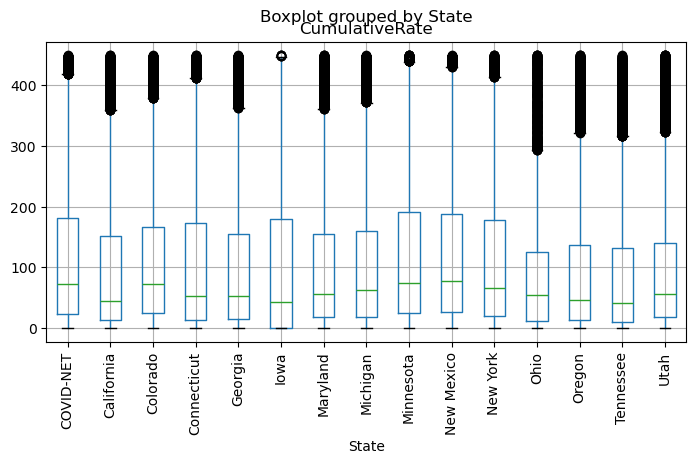

In [42]:
ax1=covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="State", figsize=(8,4))
plt.xticks(rotation=90)


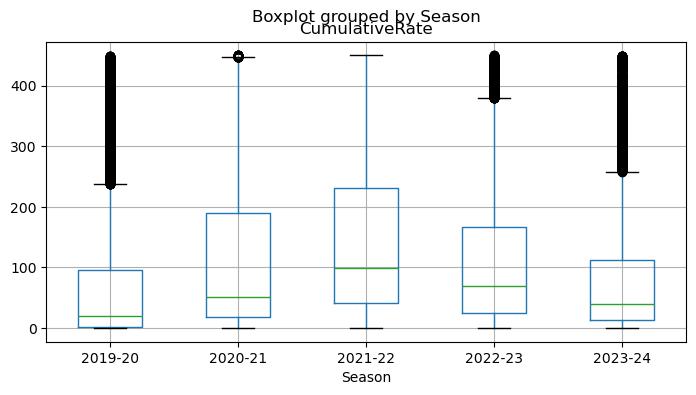

In [134]:
#WeeklyRate
#plt.plot(covid19_data["Season"].head(), covid19_data["WeeklyRate"].head())
#covid19_data.loc[covid19_data["Season"]=="2021-22"]
# plt.plot(covid19_data.loc[covid19_data["Season"]=="2021-22","Season"], covid19_data.loc[covid19_data["Season"]=="2021-22","WeeklyRate"])

#plt.plot( covid19_data["WeeklyRate"],covid19_data["Season"])

# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.plots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# plt.boxplot(covid19_data["Season"],covid19_data["WeeklyRate"])
# plt.show()
ax1=covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Season", figsize=(8,4))
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')


# plt.title("Season versus WeeklyRate")
# plt.xlabel("Season")
# plt.ylabel("WeeklyRate")
# plt.show()

In [135]:
covid19_data.columns

Index(['State', 'Season', '_WeekendDate', 'AgeCategory_Legend', 'Sex_Label',
       'Race_Label', 'Type', 'WeeklyRate', 'CumulativeRate'],
      dtype='object')

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'A/PI, non-Hispanic'),
  Text(2, 0, 'AI/AN, non-Hispanic'),
  Text(3, 0, 'All'),
  Text(4, 0, 'Black, non-Hispanic'),
  Text(5, 0, 'Hispanic'),
  Text(6, 0, 'White, non-Hispanic')])

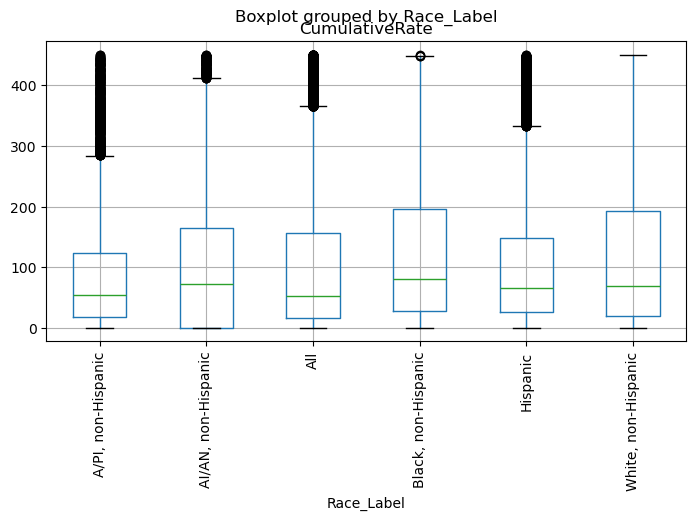

In [138]:
ax1=covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Race_Label", figsize=(8,4))
plt.xticks(rotation=90)

In [139]:
covid19_data["Race_Label"].value_counts()

Race_Label
All                    95120
Hispanic               10066
A/PI, non-Hispanic     10066
AI/AN, non-Hispanic    10066
Black, non-Hispanic    10066
White, non-Hispanic    10066
Name: count, dtype: int64

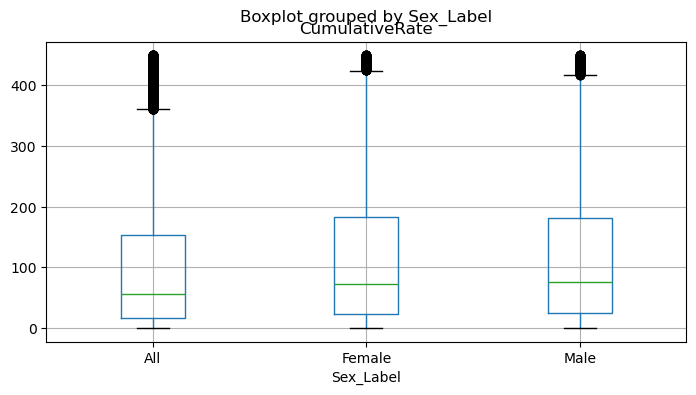

In [130]:
#CumulativeRate

ax1=covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Sex_Label", figsize=(8,4))


145450
123572
15.041595049845307
